### Predicting House Prices with Linear Regression : 

#### Description:  
The objective of this project is to build a predictive model using linear regression to estimate a numerical outcome based on a dataset with relevant features. Linear regression is a
fundamental machine learning algorithm, and this project provides hands-on experience in
developing, evaluating, and interpreting a predictive model.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("1553768847-housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


### Columns Description : 

longitude: Longitude value for the block in California, USA  

latitude: Latitude value for the block in California, USA    

housing_median_age : Median age of the house in the block  

total_rooms : Count of the total number of rooms (excluding bedrooms) in all houses in the block 


total_bedrooms : Count of the total number of bedrooms in all houses in the block  

population : Count of the total number of population in the block  

households : Count of the total number of households in the block  

median_income : Median of the total household income of all the houses in the block  

ocean_proximity (numeric - categorical ) : Type of the landscape of the block Unique Values 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'   

median_house_value : Median of the household prices of all the houses in the block  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [19]:
df.shape

(20640, 10)

In [8]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [31]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

In [32]:
df['total_bedrooms'].isnull().sum()

0

In [13]:
df.duplicated().sum()

0

In [17]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
ocean_proximity           5
median_house_value     3842
dtype: int64

#### Univariate Analysis : 

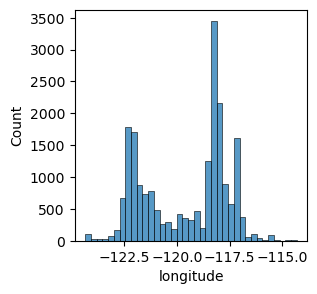

In [35]:
plt.figure(figsize=(3,3))
sns.histplot(df['longitude'])
plt.show()

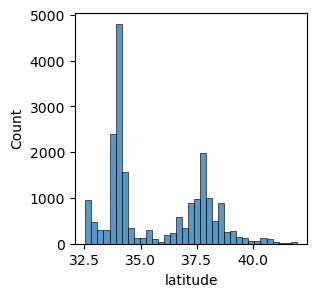

In [36]:
plt.figure(figsize=(3,3))
sns.histplot(df['latitude'])
plt.show()

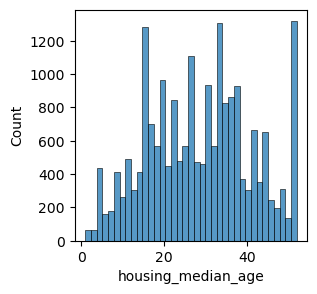

In [37]:
plt.figure(figsize=(3,3))
sns.histplot(df['housing_median_age'])
plt.show()

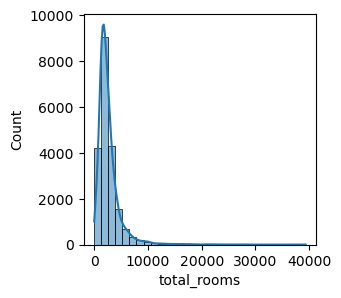

In [44]:
plt.figure(figsize=(3,3))
sns.histplot(df['total_rooms'],bins=30,kde=True)
plt.show()

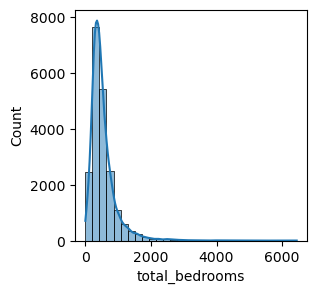

In [34]:
plt.figure(figsize=(3,3))
sns.histplot(df['total_bedrooms'],bins=30,kde=True)
plt.show()

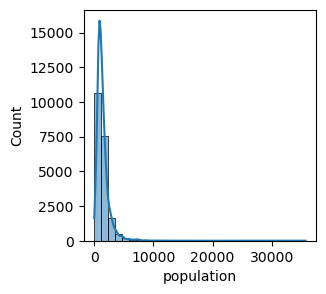

In [45]:
plt.figure(figsize=(3,3))
sns.histplot(df['population'],bins=30,kde=True)
plt.show()

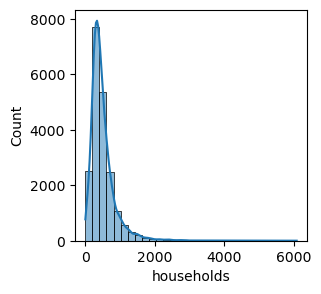

In [46]:
plt.figure(figsize=(3,3))
sns.histplot(df['households'],bins=30,kde=True)
plt.show()

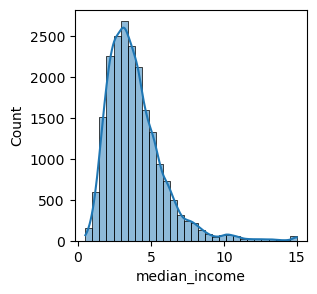

In [47]:
plt.figure(figsize=(3,3))
sns.histplot(df['median_income'],bins=30,kde=True)
plt.show()

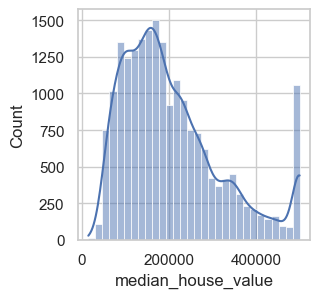

In [49]:
plt.figure(figsize=(3,3))
sns.histplot(df['median_house_value'],bins=30,kde=True)
plt.show()

In [57]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

#### Outlier Detection :

In [50]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [59]:
outliers_dict = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Find outliers
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    
    # Store results
    outliers_dict[col] = outliers[col]

# Display number of outliers per column
for col, out in outliers_dict.items():
    print(f"{col}: {len(out)} outliers")

longitude: 0 outliers
latitude: 0 outliers
housing_median_age: 0 outliers
total_rooms: 1287 outliers
total_bedrooms: 1306 outliers
population: 1196 outliers
households: 1220 outliers
median_income: 681 outliers
median_house_value: 1071 outliers


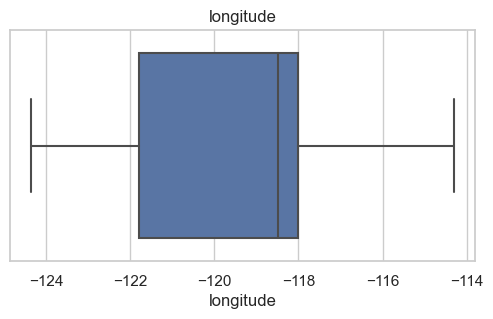

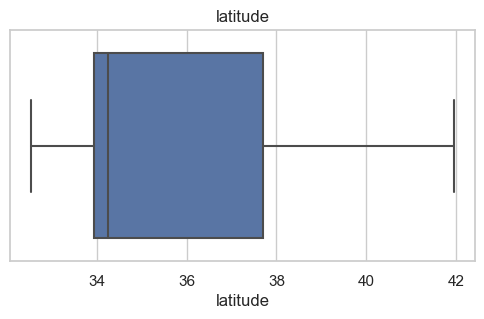

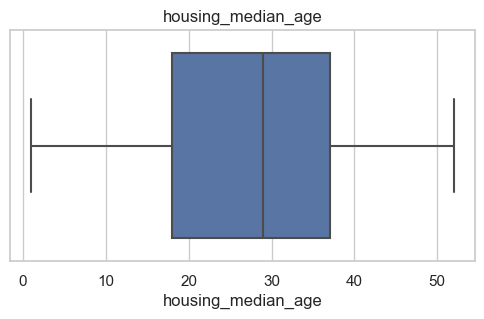

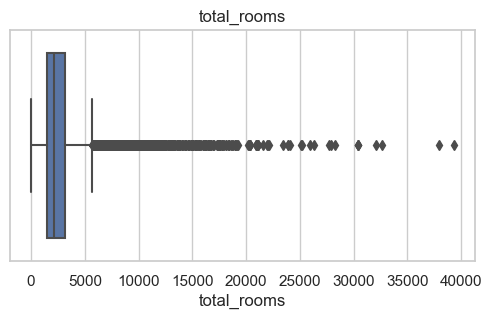

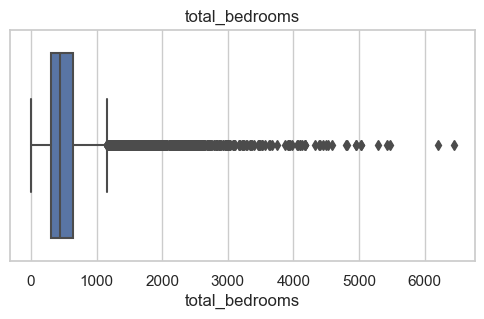

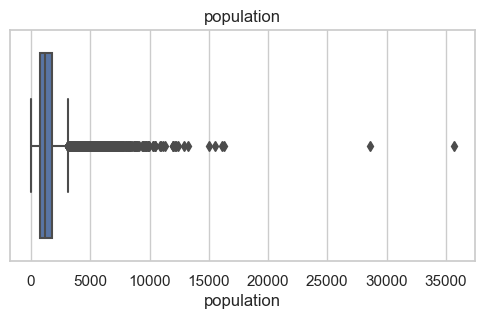

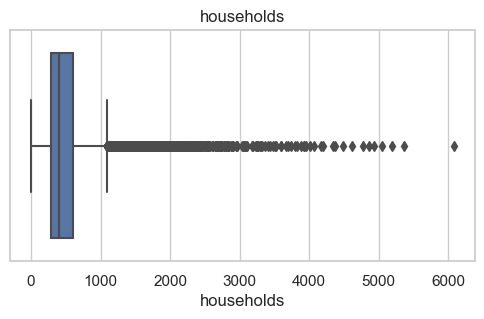

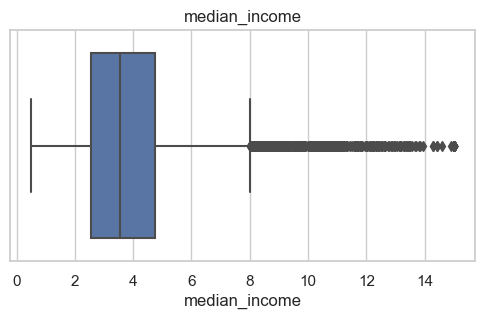

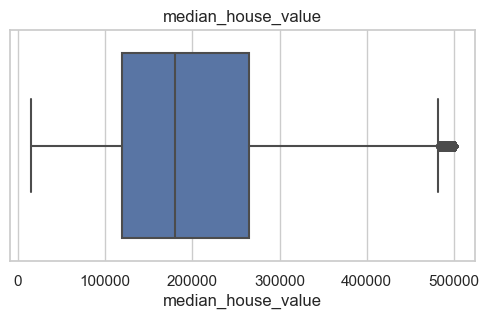

In [54]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

#### Capping : 

In [58]:
def cap_outliers(df, col):
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)
    return df

cols_to_cap = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
for col in cols_to_cap:
    df = cap_outliers(df, col)

In [60]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100
20636,-121.21,39.49,18,697.0,150.0,356.0,114.0,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700


In [76]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

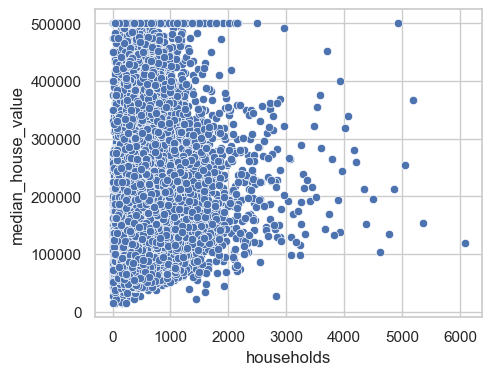

In [81]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['households'],y=df['median_house_value'])
plt.show()

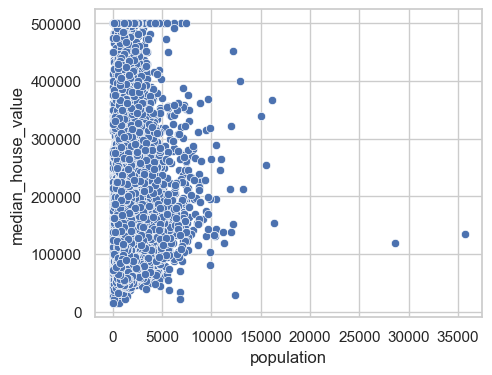

In [82]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['population'],y=df['median_house_value'])
plt.show()

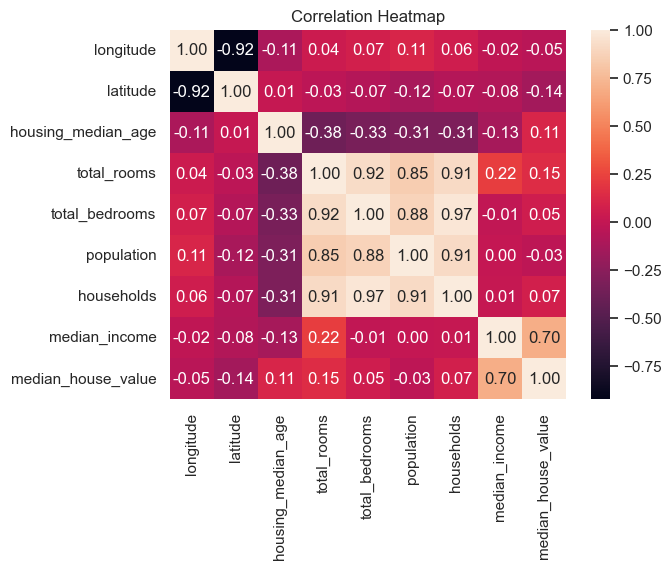

In [61]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Insights : 
Strong positive correlation: higher income have higher house prices. This is the most important finding income is the best predictor of house value.   
Thecolumns like total_rooms,total_bedrooms,population,households are highly correlated with each other if a house has more rooms, it likely has more bedrooms, more people, and more households.   
housing_median_Age and median_house_value is very weak correlation.  

In [62]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880.0,129.0,322.0,126.0,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099.0,1106.0,2401.0,1138.0,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467.0,190.0,496.0,177.0,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274.0,235.0,558.0,219.0,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627.0,280.0,565.0,259.0,3.8462,342200,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665.0,374.0,845.0,330.0,1.5603,78100,1,0,0,0
20636,-121.21,39.49,18,697.0,150.0,356.0,114.0,2.5568,77100,1,0,0,0
20637,-121.22,39.43,17,2254.0,485.0,1007.0,433.0,1.7000,92300,1,0,0,0
20638,-121.32,39.43,18,1860.0,409.0,741.0,349.0,1.8672,84700,1,0,0,0


In [63]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_test)

In [73]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.6343883929372165
MAE: 49998.848980211966
MSE: 4781311368.968673


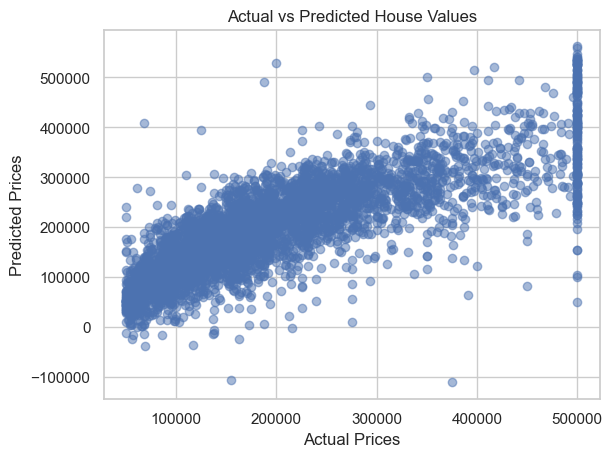

In [70]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Values")
plt.show()

Key Insights from Analysis (EDA)

Median Income has the strongest positive correlation with house value — areas with higher income tend to have higher housing prices.

Latitude and Longitude also influence prices — houses closer to the coast or in certain regions show higher median values.

Total Rooms and Bedrooms have moderate correlation, but not as strong as income.

Ocean Proximity plays a role — houses near the ocean generally have higher values.

Some variables like population or households do not have a strong linear relationship with price.

Model Performance
Metric	Value
R² Score	~0.62
Mean Absolute Error (MAE)	≈ $50,000
Mean Squared Error (MSE)	≈ 4.9 × 10⁹
Root Mean Squared Error (RMSE)	≈ $70,000

The model explains around 62% of the variance in housing prices — a decent baseline for a simple linear regression.

Conclusion

The Linear Regression model provides a good starting point for predicting house prices using demographic and location features.

Median Income is the most important predictor of housing prices.

The model can be further improved by:

Removing outliers

Applying feature scaling and transformations

Trying advanced models (like Random Forest or Gradient Boosting)

Adding new features such as distance to city center or ocean.

Final Takeaway

This project demonstrates how data preprocessing, visualization, and regression modeling can be used together to uncover key factors affecting housing prices and make reliable predictions.